In [3]:
import torch
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
import csv

file1=open('./grad_data/grad1.csv',mode='r')
csvReader=csv.reader(file1)
w_size_list=[150,2400,48000,10080,840] # weight,bias size
b_size_list=[6,16,120,84,10]

grad_data=list()
weight_data=list()
# Structure
# time layer element
# grad_data = weight ,bias 순서의 layer별 데이터
# weight_data=weight의 time list, layer list, element tensor
# data read
for i,line in enumerate(csvReader):
    line_float=list(map(float,line))
    grad_data.append(list())
    weight_data.append(list())
    for num_w,num_b in zip(w_size_list,b_size_list):
        tmp_w=torch.tensor(line_float[:num_w])
        line=line[:num_w]
        grad_data[-1].append(tmp_w)
        weight_data[-1].append(tmp_w)

        tmp_b=torch.tensor(line_float[:num_b])
        line=line[:num_b]
        grad_data[-1].append(tmp_b)

print(len(weight_data))
TIME_STEP=len(weight_data)
print(len(weight_data[0]))
for w in weight_data[0]:
    print(w.size())

    

50
5
torch.Size([150])
torch.Size([2400])
torch.Size([48000])
torch.Size([10080])
torch.Size([840])


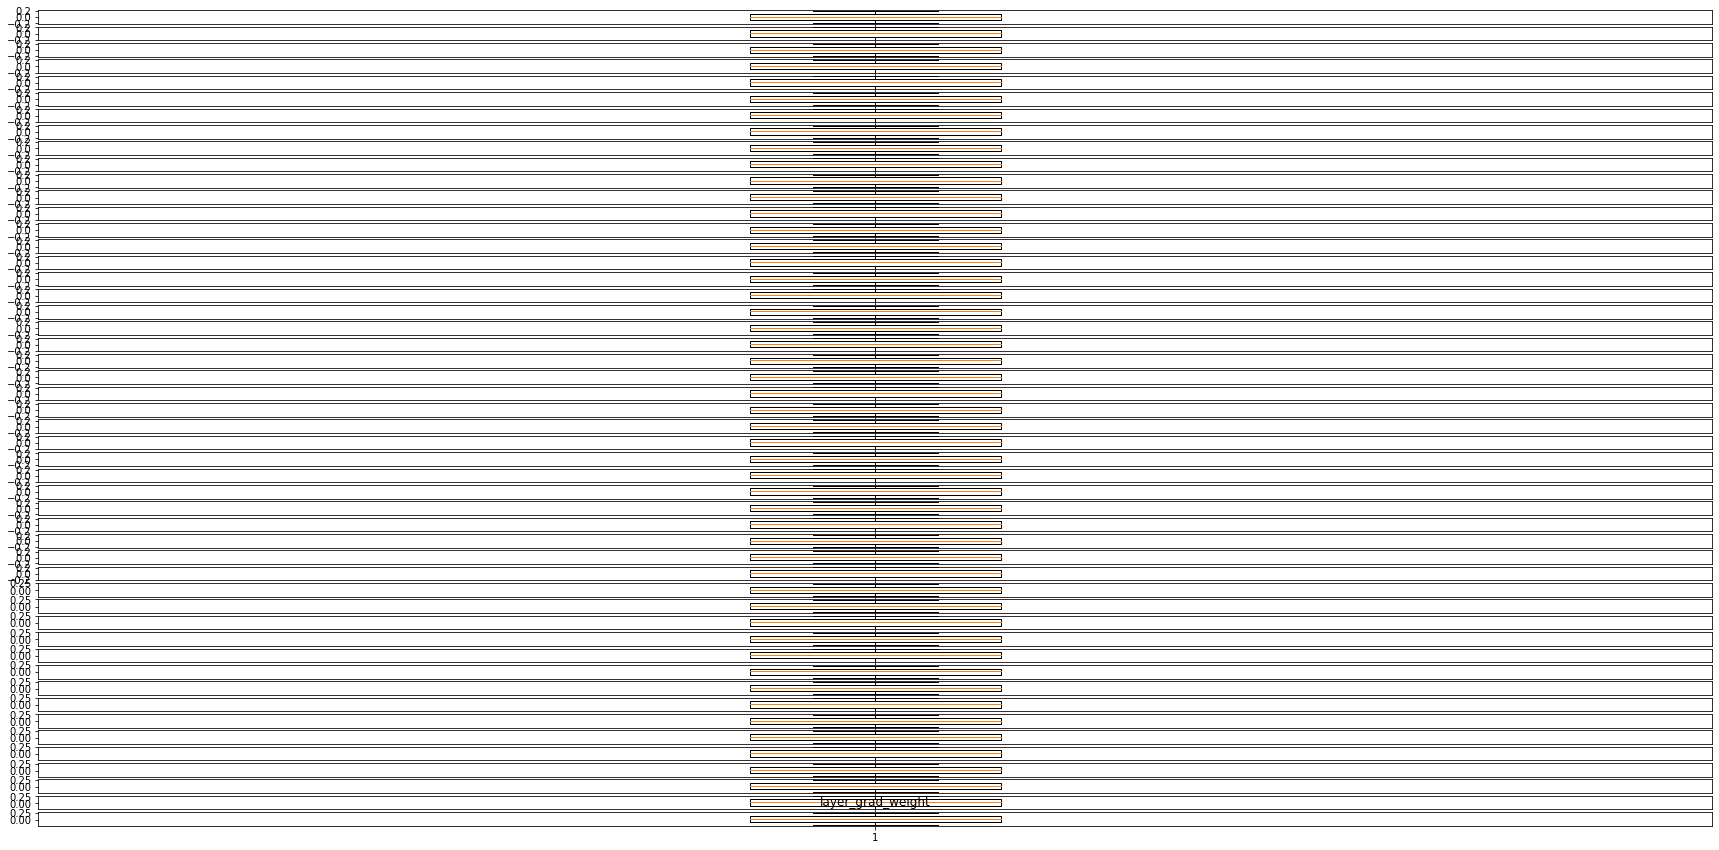

In [3]:
#Box plot for checking distribution
total_size=len(weight_data)
plt.figure(figsize=(30, 15))
for i, w in enumerate(weight_data):
    plt.subplot(total_size,1,i+1)
    plt.boxplot([w[0]])
plt.title('layer_grad_weight')
plt.savefig('fig1.png', dpi=300)

In [4]:
# element에 대해서 time기반 비교
elem_sum_w=list()
time_list=list()
for t,_ in enumerate(weight_data):
    time_list.append(t)

# 시간에 대해서 저장
# layer elem time 순 -> elem_w_list
elem_w_list=[[list() for _ in w] for w in weight_data[0]]# 뒤에 시간별로 더하면됨

for t,w in enumerate(weight_data):# 모든 시간 t에 대해서
    for j,w_layer in enumerate(w):# 각 layer에 대해서
        for i,elem_w in enumerate(w_layer): #layer내에 대해서
            elem_w_list[j][i].append(elem_w)
print("Done")

Done


In [2]:
#elem_w_list의 size: layer,weight_i
# plot and save
for j,w_node in enumerate(elem_w_list):
    for i,w_elem in enumerate(w_node):
        plt.figure()
        plt.plot(time_list,w_elem)
        plt.title('layer{}_node{}'.format(j,i))
        plt.xlabel('time(epoch')
        plt.ylabel('grad')
        plt.savefig('./grad_data/layer{}_node{}.png'.format(j,i),dpi=200,facecolor='#eeeeee')

NameError: name 'elem_w_list' is not defined

In [35]:
#time 기반 layer별로 grad 값을 모두 합쳐서 비교
# elem_w_list
#

#sum_w
# layer,time,weight_sum(elem들의 float)

sum_w=[[list() for i in range(TIME_STEP)] for w in elem_w_list] # layer내의/ 시간에 대한/ grad 요소들의 합
print(len(sum_w))
print(len(sum_w[0]))

for i,node_w in enumerate(elem_w_list):# layer구분
    for t,elem in enumerate(elem_w): # 각 time 의 elem
        sum_w[i][t]=0.0
for i,node_w in enumerate(elem_w_list):# layer구분
    for elem_w in node_w:# time값을 갖는 elem
        for t,elem in enumerate(elem_w): # 각 time 의 elem
            sum_w[i][t]+=elem.item()/float(w_size_list[i])
print(sum_w[0][0]) 
            


5
50
0.004312595341665048


In [ ]:
# plot and save
# avg를 위해서 w_size를 zip함 ( node수가 증가하므로 )
for j,w in enumerate(sum_w):
    plt.figure()
    plt.plot(time_list,w)
    plt.title('layer{}_all_node'.format(j))
    plt.xlabel('time(epoch)')
    plt.ylabel('grad')
    plt.savefig('./grad_data/all_node_layer{}.png'.format(j),dpi=200,facecolor='#eeeeee')

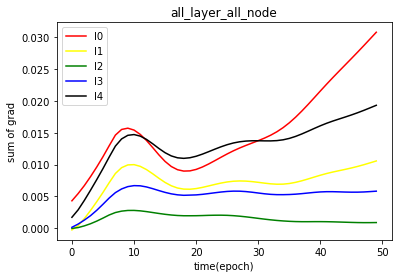

In [38]:
# plot and save
color_list=['red','yellow','green','blue','black']
plt.figure()
for j,(w,color) in enumerate(zip(sum_w,color_list)):
    plt.plot(time_list,w,color=color)
plt.title('all_layer_all_node'.format(j))
plt.xlabel('time(epoch)')
plt.ylabel('sum of grad')
plt.legend(['l0','l1','l2','l3','l4'])
plt.savefig('./grad_data/all_node_all_layer.png',dpi=200,facecolor='#eeeeee')

In [ ]:
# 모든 변화량 (x축), element of weight
# layer별로 다르게 분할
num_node_list=[len(w) for w in elem_w_list]
sum_grad_in_time=[[list() for i in w] for w in elem_w_list]
for i,node_w in enumerate(elem_w_list):# layer구분
    for j,elem_w in enumerate(node_w):# time값을 갖는 elem
        sum_grad=torch.tensor(elem_w).sum().item()# 모든 시간에 대한 합
        sum_grad_in_time[i][j]=sum_grad

In [ ]:
for i,(num_node,sum_grad_time) in enumerate(zip(num_node_list,sum_grad_in_time)):
    x_axis=[i for i in range(num_node)]
    plt.figure()
    plt.plot(x_axis,sum_grad_time)
    plt.title('{}_layer_all_node'.format(i))
    plt.xlabel('element_num')
    plt.ylabel('sum of grad in all the times')
    plt.savefig('./grad_data/{}_layer_all_node.png'.format(i),dpi=200,facecolor='#eeeeee')


In [ ]:
# 전체 시간에 대한 gradient 변화량의 합 (node 단위)
